In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages",
                          file_name = "raw_dataset")

In [4]:
dataset

AnnData object with n_obs × n_vars = 28113936 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [5]:
dataset.uns["metadata"]

Metadata(71 entries with factors ['organ', 'genotype', 'sex', 'experiment', 'age'])

In [6]:
dataset = dataset[~dataset.obs["sample_ID"].isin(["1", "2","9", "10", "16", "17", "24", "25",
                                                  "32", "33", "40", "41", "48", "49", "56",
                                                  "57", "64", "65"]),:].copy()
dataset

AnnData object with n_obs × n_vars = 20018950 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [7]:
fp.sync.synchronize_dataset(dataset)

['obs_names']
     ... updated metadata


In [8]:
dataset.uns["metadata"]

Metadata(53 entries with factors ['organ', 'genotype', 'sex', 'experiment', 'age'])

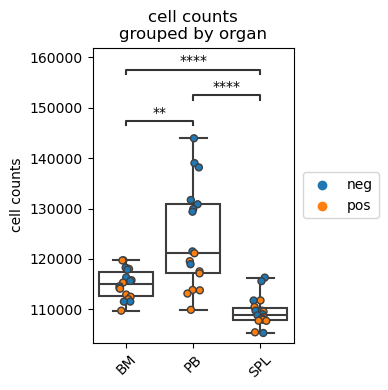

In [9]:
### first, we plot the cell counts
fp.pl.cell_counts(dataset,
                  gate = "singlets",
                  groupby = "organ",
                  colorby = "genotype",
                  figsize = (4,4))

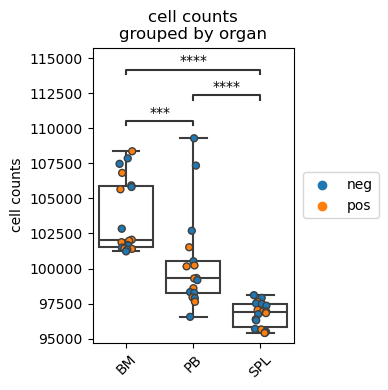

In [10]:
fp.pl.cell_counts(dataset,
                  gate = "live",
                  groupby = "organ",
                  colorby = "genotype",
                  figsize = (4,4))

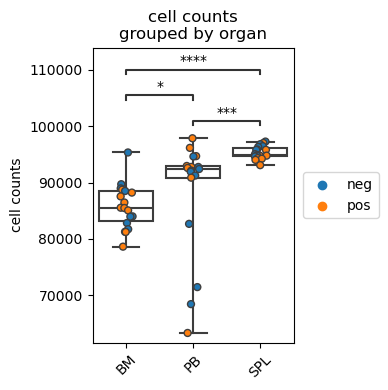

In [11]:
fp.pl.cell_counts(dataset,
                  gate = "CD45+",
                  groupby = "organ",
                  colorby = "genotype",
                  figsize = (4,4))

In [12]:
### we calculate the gate frequencies
fp.tl.gate_frequencies(dataset)

In [13]:
### for the freq_of parameter, valid inputs are 'parent', 'grandparent' or a gate

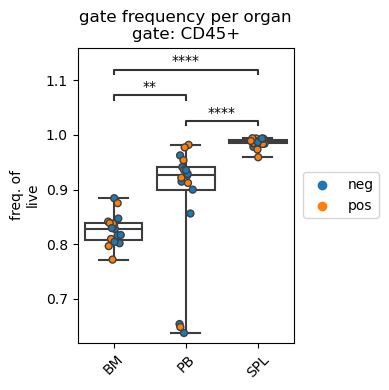

In [14]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "parent",
                     figsize = (4,4))

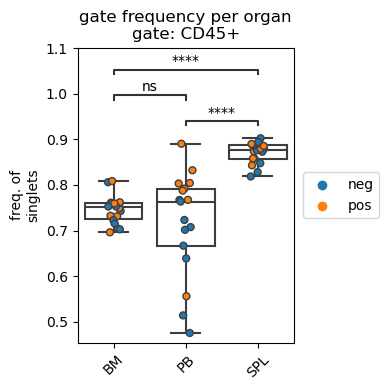

In [15]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "grandparent",
                     figsize = (4,4))

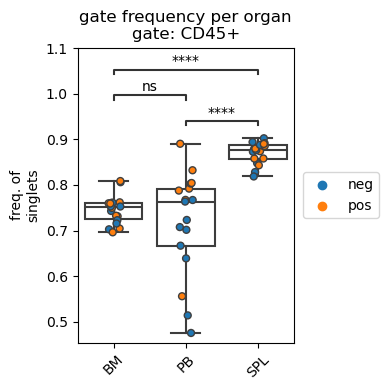

In [16]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "singlets",
                     figsize = (4,4))

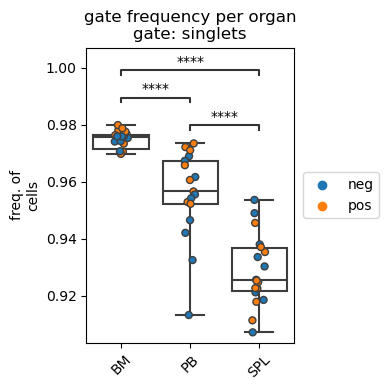

In [17]:
fp.pl.gate_frequency(dataset,
                     gate = "singlets",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "parent",
                     figsize = (4,4))

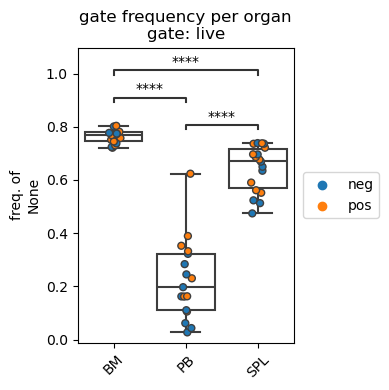

In [18]:
fp.pl.gate_frequency(dataset,
                     gate = "live",
                     groupby = "organ",
                     colorby = "genotype",
                     figsize = (4,4))

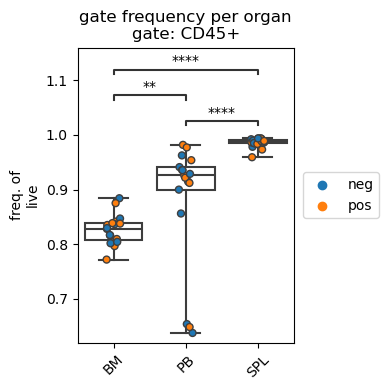

In [19]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "parent",
                     figsize = (4,4))

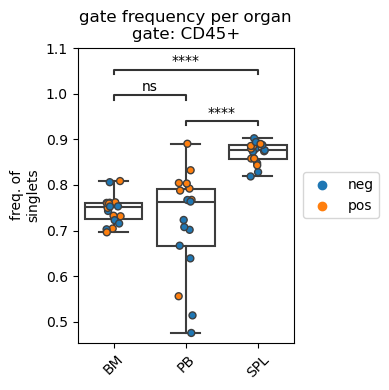

In [20]:
fp.pl.gate_frequency(dataset,
                     gate = "CD45+",
                     groupby = "organ",
                     colorby = "genotype",
                     freq_of = "grandparent",
                     figsize = (4,4))

In [21]:
dataset

AnnData object with n_obs × n_vars = 20018950 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'singlets', 'live', 'CD45+'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [22]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages/",
                file_name = "raw_dataset_stained",
                overwrite = True)

File saved successfully
